<a href="https://colab.research.google.com/github/Juan4562020/Aprendizaje-Automatico/blob/main/Taller_1_RegresionLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [338]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

Punto 1


In [339]:
file = open('/content/KDDTrain+.txt',"r")
data = []
for index,line in enumerate(file.readlines()):
  if index == 0:
    data.append(line)
    continue
  data.append(line)
data

['duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class\n',
 '0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,1,0,0,150,25,0.17,0.03,0.17,0,0,0,0.05,0,normal\n',
 '0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0,0,0,0,0.08,0.15,0,255,1,0,0.6,0.88,0,0,0,0,0,normal\n',
 '0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1,1,0,0,0.05,0.07,0,255,26,0.1,0.05,0,0,1,1,0,0,anomaly\n',
 '0,tcp,http,SF,232,81

In [340]:
#Punto 2: lectura del conjunto de datos
df = pd.read_csv('/content/KDDTrain+.txt')

In [341]:
#Punto 3: Mostrar columnas del dataframe
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [342]:
#Punto 4: Copia del conjunto de datos
dfCopy = df.copy()

In [343]:
#Punto 5: Mostrar 10 datos del dataframe
dfCopy.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [344]:
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [345]:
#Punto 7: Mostrar información estadistica
dfCopy.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

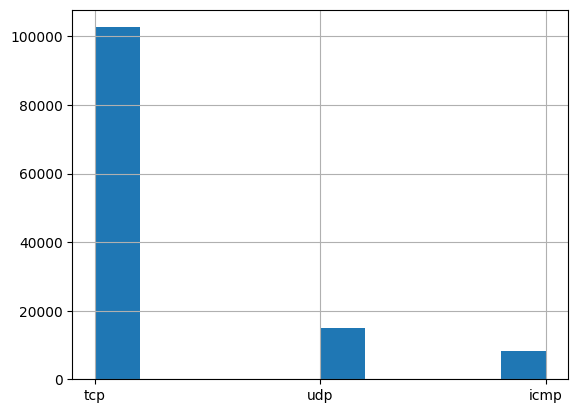

In [346]:
#Punto 8

dfCopy["protocol_type"].hist()


In [347]:
#Punto 9
# 0 - es Normal
# 1 - es Anomaly
dfCopy["class"] = pd.factorize(dfCopy["class"])[0]
dfCopy["class"]

0         0
1         0
2         1
3         0
4         0
         ..
125968    1
125969    0
125970    0
125971    1
125972    0
Name: class, Length: 125973, dtype: int64

In [348]:
#Punto 10
corr = dfCopy.corr()
corr


<ipython-input-348-5b23fb5363c7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfCopy.corr()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064218,0.042679,...,-0.109776,-0.116005,0.254195,0.228737,-0.026669,-0.064948,-0.064361,0.173815,0.199024,0.048785
src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,...,-0.006861,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,0.005921
dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,...,-0.004224,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223,0.004118
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,...,-0.014159,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303,0.007191
wrong_fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072418,-0.001044,...,-0.045240,-0.048733,0.059797,0.037177,-0.016252,-0.051917,-0.055917,0.028890,-0.033682,0.095905
urgent,0.003830,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,0.097507,0.007299,0.033329,...,-0.007897,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912,-0.002787
hot,0.000705,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,0.003715,0.116435,0.002014,...,-0.051864,-0.036293,-0.012293,-0.034536,-0.024715,-0.058222,-0.058214,-0.030555,-0.031670,-0.013083
num_failed_logins,0.009528,-0.000208,0.000504,-0.000381,-0.002418,0.097507,0.003715,1.000000,-0.006439,0.019085,...,-0.023053,-0.001576,-0.001945,-0.005526,0.003302,-0.011648,-0.012299,0.018660,0.017359,-0.003755
logged_in,-0.064218,-0.003353,-0.002894,-0.011402,-0.072418,0.007299,0.116435,-0.006439,1.000000,0.014413,...,0.624365,0.604058,-0.256065,-0.160994,-0.055953,-0.491478,-0.493264,-0.275972,-0.272806,-0.690171
num_compromised,0.042679,-0.000086,0.001233,-0.000164,-0.001044,0.033329,0.002014,0.019085,0.014413,1.000000,...,-0.010321,-0.004995,0.002981,-0.002045,0.004252,-0.004377,-0.004898,-0.003647,-0.003219,-0.010198


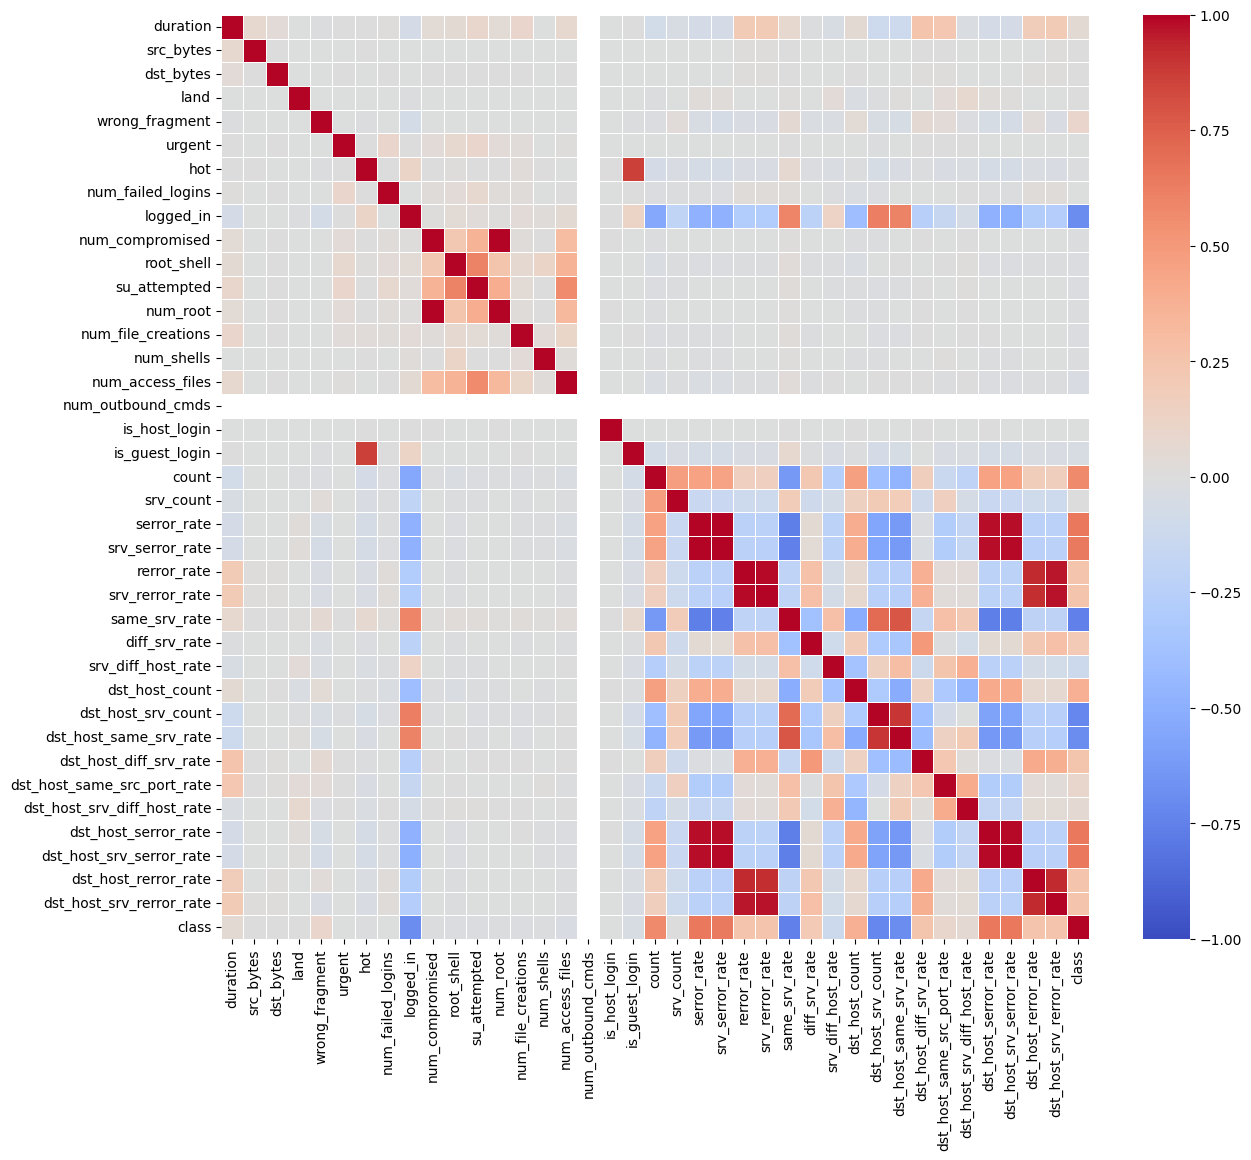

In [349]:
#Punto 11
plt.figure(figsize=(14,12))
sns.heatmap(corr,linewidth=.5,cmap='coolwarm',vmax=1,vmin=-1)
plt.show()


<p style='font-size:20px'>
 De este punto para abajo, vamos a encontrar la solución de los siguientes puntos <mark>12, 13, 14, 15, 16, 17, 18<mark> con la utilización de un metodo que permite construir el modelo.

 Se presenta de esta forma el proceso debido a que el conjunto de datos entregado no contiene valores nulos para realizar los puntos de eliminación de campos vacios; sin embargo se busco implementar una posible solución en caso que se encuentran valores vacios.
</p>




In [350]:
#Punto 12
from sklearn.model_selection import train_test_split
x = dfCopy[["dst_host_srv_serror_rate","dst_host_serror_rate","dst_host_same_srv_rate","dst_host_srv_count",\
            "srv_serror_rate","serror_rate","count","logged_in","dst_host_count","rerror_rate","srv_rerror_rate","dst_host_srv_rerror_rate","dst_host_rerror_rate","diff_srv_rate"]]
y = dfCopy["class"]
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)


In [351]:
#Punto 16
from sklearn.linear_model import LogisticRegression
def trainModel(xtrain,ytrain):
  model = LogisticRegression(max_iter=190)
  model.fit(xtrain,ytrain)
  return model

In [352]:
#Punto 13,14 y 15
train_df_copy = x_train.copy()
model_train = None
exists_nulls = x_train.isnull().any().any()
df_imputed = None # Dataframe con los valores imputados en caso de existir valores nulos
x_train_null = None # Dataframe con los valores nulos eliminados
if exists_nulls == True:
  print("Existen valores nulos")
  x_train_null = x_train.dropna()
  y_train_null = y_train.dropna()
  if(len(y_train_null)!=len(x_train_null)):
    print("Estas haciendo algo mal, revisar la forma de eliminar")
  imputer = SimpleImputer(strategy='constant')
  df_imputed = pd.DataFrame(data=imputer.fit(train_df_copy),columns = train_df_copy.columns)
  model_train = trainModel(x_train_null,y_train_null,x_test,y_test)
else:
  print("No existen valores nulos")
  model_train = trainModel(x_train,y_train)

No existen valores nulos


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [353]:
#Punto 17
yPredict = model_train.predict(x_test)

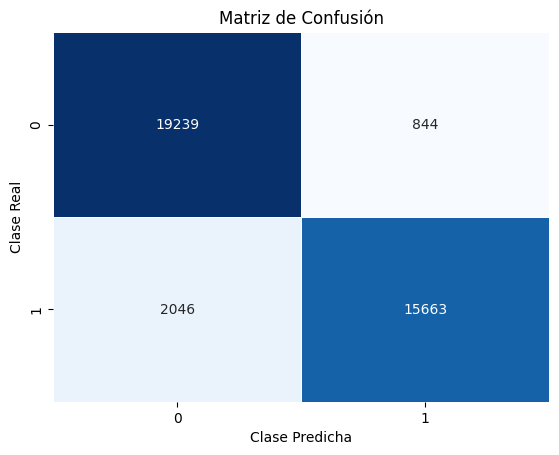

In [354]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,yPredict)
# plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix,linewidth=.5,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')
plt.show()

In [355]:
from numpy import recarray
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, yPredict)
print("El modelo presenta un valor de presicion del",str(precision),"el cual me esta indicando que el modelo tiene aproximadamente un 5% de margen de error")

recall =  recall_score(y_test, yPredict)
print("El modelo presenta un valor de sencibilidad para predecir casos que son positivos del",str(recall),"permitiendo saber que este modelo logra hacer buenas prediciones")

f1 = f1_score(y_test, yPredict)
print("Esta metrica me permite identificar si realmente es un buen modelo, ya que esta busca un equilibrio entre las dos anteriores metricas, el valor de",str(f1),"obtenido es un valor aceptable ya que me esta indicando que el modelo tiene una buena capacidad de predecir de forma correcta ")

El modelo presenta un valor de presicion del 0.9488701762888472 el cual me esta indicando que el modelo tiene aproximadamente un 5% de margen de error
El modelo presenta un valor de sencibilidad para predecir casos que son positivos del 0.884465526003727 permitiendo saber que este modelo logra hacer buenas prediciones
Esta metrica me permite identificar si realmente es un buen modelo, ya que esta busca un equilibrio entre las dos anteriores metricas, el valor de 0.9155365910685059 obtenido es un valor aceptable ya que me esta indicando que el modelo tiene una buena capacidad de predecir de forma correcta 


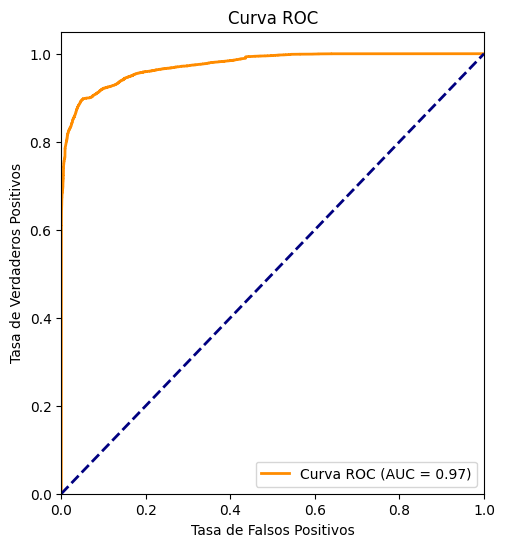

In [356]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

y_prob = model_train.predict_proba(x_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 6))

# Curva ROC
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

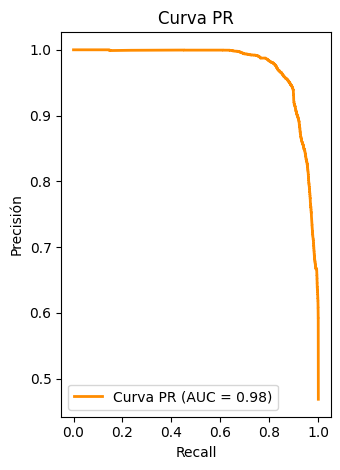

In [359]:
#Calcular PR
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='darkorange', lw=2, label='Curva PR (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva PR')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()